Imports

In [12]:
import xobjects as xo
import xtrack as xt
import xpart as xp

import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 

clight=constants.speed_of_light

In [13]:
from ion_properties import lead

ion=lead
q0=ion.q0
mass0 = ion.mass0

gamma = ion.gamma_rel
beta = ion.beta_rel # ion beta
p0c = gamma*mass0*beta #eV/c
# p0c*1e-12/





Ion properties

In [14]:

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# for ion in [lead]:# Ion properties:
#         # Ion properties:
#         q0=ion.q0
#         mass0 = ion.mass0

#         gamma = ion.gamma_rel
#         beta = ion.beta_rel # ion beta
#         p0c = gamma*mass0*beta #eV/c

#         # Source: https://www.sciencedirect.com/science/article/pii/S0146641020300399
#         # Equation 4.4
#         N_pb = int(1.9*1e8) #ion-bunch intensity for lead
#         N_a = int(N_pb*(ion.Z/82)**-1.9) #ion-bunch intensity for arbitrary ion with charge Z

#         # Source: https://www.sciencedirect.com/science/article/pii/S0146641020300399
#         # Ion beam dimensions:
#         sigma_x = 1.047e-3 # m
#         sigma_y = 0.83e-3  # m
#         sigma_z = 0.063 # m
#         sigma_dp = 2e-4 # relative ion momentum spread

#         sigma_px=4.36*1e-3 #calculated from the Twiss parameters
#         sigma_py=4.36*1e-3 #calculated from the Twiss parameters

#         num_particles = int(1e3)

#         particles0 = xp.Particles(
#         mass0 = mass0, # eV/c^2
#         q0    = q0,
#         p0c   = p0c, # eV
#         x     = np.random.normal(scale=sigma_x, size=num_particles),
#         px    = np.random.normal(scale=sigma_px, size=num_particles),
#         y     = np.random.normal(scale=sigma_y, size=num_particles),
#         py    = np.random.normal(scale=sigma_py, size=num_particles),
#         zeta  = np.random.normal(scale=sigma_z, size=num_particles),
#         delta = np.random.normal(scale=sigma_dp, size=num_particles)
#                 )

#         ##################
#         # Laser Cooler #
#         ##################

#         #Laser-ion beam collision angle
#         theta_l = 2.6*np.pi/180 # rad
#         nx = 0; ny = -np.sin(theta_l); nz = -np.cos(theta_l)

#         ion_excited_lifetime=ion.excited_lifetime
#         # Ion excitation energy:
#         hw0 = ion.hw0
#         hc=constants.hbar*clight/constants.e # eV*m (ħc)
#         lambda_0 = 2*np.pi*hc/hw0 # m -- ion excitation wavelength

#         lambda_l = lambda_0*gamma*(1 + beta*np.cos(theta_l)) # m -- laser wavelength

        
#         # Shift laser wavelength for fast longitudinal cooling:
#         # lambda_l = lambda_l*(1+sigma_dp) # m

#         laser_frequency = clight/lambda_l # Hz
#         sigma_w = 2*np.pi*laser_frequency*sigma_dp
#         #sigma_w = 2*np.pi*laser_frequency*sigma_dp/2 # for fast longitudinal cooling

#         sigma_t = 1/sigma_w # sec -- Fourier-limited laser pulse
#         #print('Laser pulse duration sigma_t = %.2f ps' % (sigma_t/1e-12))
        
#         #print('Laser wavelength = %.2f nm' % (lambda_l/1e-9))

#         laser_waist_radius = 1.3e-3 #m
#         laser_energy = 5e-3

#         GF_IP = xt.PulsedLaser(
#                         laser_x=0,
#                         laser_y=0,
#                         laser_z=0,
                        
#                         laser_direction_nx = 0,
#                         laser_direction_ny = ny,
#                         laser_direction_nz = nz,
#                         laser_energy         = laser_energy, # J
#                         laser_duration_sigma = sigma_t, # sec
#                         laser_wavelength = lambda_l, # m
#                         laser_waist_radius = laser_waist_radius, # m
#                         laser_waist_shift = 0, # m
#                         ion_excitation_energy = hw0, # eV
#                         ion_excited_lifetime  = ion_excited_lifetime, # sec                   
#                         )

#         particles=particles0.copy()

#         GF_IP.track(particles)

#         excited=particles.state==2

#         fraction_excitation = sum(excited)/len(excited)

        

#         print(f'Intensity of ion beam               : {N_a:.2e}')
#         print(f'Fraction of excited particles       : {fraction_excitation*100:.3}%')
#         print(f'Number of emitted photons per bunch : {fraction_excitation*N_a:.2e}')
#         print('-----------------------------------------------------------------------')
        
#         omega_laser = 2 * np.pi * hc / lambda_l

#         maximum_emitted_photon=hw0*2*gamma #Lorentz boost

#         print(f'Laser_photon: {omega_laser:.2f} ev')
#         print(f'hw0: {hw0:.2f} ev')
#         print(f'Maximum_emitted_photon: {maximum_emitted_photon*1e-3:.2f} Kev')

#         # Random polar angle in the ion's frame:
#         costheta = np.random.uniform(-1,+1, size=num_particles)
#         theta_emitt_ion = np.arccos(costheta)

#         # Emitted photon energy in the lab frame:
#         hw1_emitted = gamma*(1+particles0.delta) * ( 1 + beta*np.cos(theta_emitt_ion) )*hw0 # eV
#         # Only excited atoms are emitting of course:
#         hw1_excited_and_emitted = hw1_emitted *excited

#         # Transverse emission doesn't have lorentz boost.
#         # Only longitudinal has Lorenzt boost.
#         # Therefore, the angle of outgoing angle of the photons is the Lorentz boost theta_emitt/(2*gamma)

#         theta_photon_lab=theta_emitt_ion/(2*gamma) 

#         plt.scatter(theta_photon_lab*1e3,hw1_emitted*1e-3,label=f'{ion.name}') #can also plot hw1_excited_and_emitted instead of hw1_emitted
# plt.xlabel('$\Theta$ [mrad]')
# plt.ylabel('Energy [keV]')
# #plt.legend()
# plt.tight_layout()
# plt.savefig('figures/Photon_energy_distribution.png', dpi=300)
# plt.show()

attempt 2 taking into account the momentum of the ions

Intensity of ion beam               : 9.00e+07
Fraction of excited particles       : 14.0%
Number of emitted photons per bunch : 1.26e+07
-----------------------------------------------------------------------
Number of emitted photons per bunch per second : 5.47e+11
Number of emitted photons per second : 1.97e+13
-----------------------------------------------------------------------
Laser_photon: 1.20 ev
hw0: 230.82 ev
Maximum_emitted_photon: 44.36 Kev


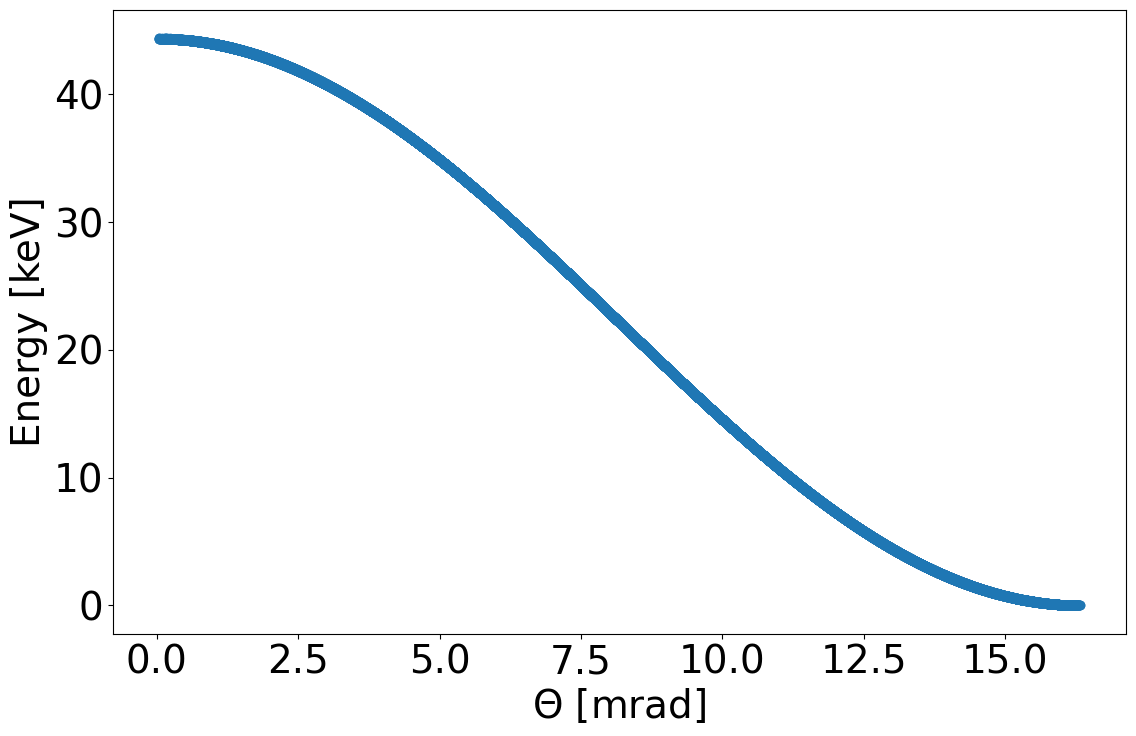

In [15]:

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 28})

for ion in [lead]:# Ion properties:
        # Ion properties:
        q0=ion.q0
        mass0 = ion.mass0

        gamma = ion.gamma_rel
        beta = ion.beta_rel # ion beta
        p0c = gamma*mass0*beta #eV/c

        # # Source: https://www.sciencedirect.com/science/article/pii/S0146641020300399
        # # Equation 4.4
        # N_pb = int(1.9*1e8) #ion-bunch intensity for lead
        # N_a = int(N_pb*(ion.Z/82)**-1.9) #ion-bunch intensity for arbitrary ion with charge Z

        # Source: https://www.sciencedirect.com/science/article/pii/S0146641020300399
        # Ion beam dimensions:
        sigma_x = 1.047e-3 # m
        sigma_y = 0.83e-3  # m
        sigma_z = 0.063 # m
        sigma_dp = 2e-4 # relative ion momentum spread

        sigma_px=4.36*1e-3 #calculated from the Twiss parameters
        sigma_py=4.36*1e-3 #calculated from the Twiss parameters

        num_particles = int(2e5)

        particles0 = xp.Particles(
        mass0 = mass0, # eV/c^2
        q0    = q0,
        p0c   = p0c, # eV
        x     = np.random.normal(scale=sigma_x, size=num_particles),
        px    = np.random.normal(scale=sigma_px, size=num_particles),
        y     = np.random.normal(scale=sigma_y, size=num_particles),
        py    = np.random.normal(scale=sigma_py, size=num_particles),
        zeta  = np.random.normal(scale=sigma_z, size=num_particles),
        delta = np.random.normal(scale=sigma_dp, size=num_particles)
                )

        ##################
        # Laser Cooler #
        ##################

        #Laser-ion beam collision angle
        theta_l = 2.6*np.pi/180 # rad
        nx = 0; ny = -np.sin(theta_l); nz = -np.cos(theta_l)

        ion_excited_lifetime=ion.excited_lifetime
        # Ion excitation energy:
        hw0 = ion.hw0
        hc=constants.hbar*clight/constants.e # eV*m (ħc)
        lambda_0 = 2*np.pi*hc/hw0 # m -- ion excitation wavelength

        lambda_l = lambda_0*gamma*(1 + beta*np.cos(theta_l)) # m -- laser wavelength

        
        # Shift laser wavelength for fast longitudinal cooling:
        # lambda_l = lambda_l*(1+sigma_dp) # m

        laser_frequency = clight/lambda_l # Hz
        sigma_w = 2*np.pi*laser_frequency*sigma_dp
        #sigma_w = 2*np.pi*laser_frequency*sigma_dp/2 # for fast longitudinal cooling

        sigma_t = 1/sigma_w # sec -- Fourier-limited laser pulse
        #print('Laser pulse duration sigma_t = %.2f ps' % (sigma_t/1e-12))
        
        #print('Laser wavelength = %.2f nm' % (lambda_l/1e-9))

        laser_waist_radius = 1.3e-3 #m
        laser_energy = 5e-3

        GF_IP = xt.PulsedLaser(
                        laser_x=0,
                        laser_y=0,
                        laser_z=0,
                        
                        laser_direction_nx = 0,
                        laser_direction_ny = ny,
                        laser_direction_nz = nz,
                        laser_energy         = laser_energy, # J
                        laser_duration_sigma = sigma_t, # sec
                        laser_wavelength = lambda_l, # m
                        laser_waist_radius = laser_waist_radius, # m
                        laser_waist_shift = 0, # m
                        ion_excitation_energy = hw0, # eV
                        ion_excited_lifetime  = ion_excited_lifetime, # sec                   
                        )

        particles=particles0.copy()

        GF_IP.track(particles)

        excited=particles.state==2

        fraction_excitation = sum(excited)/len(excited)

        N_a=0.9*1e8

        circumference=6911.5038
        T_per_turn = circumference/(clight*beta)
        num_bunch_in_ring = 36
        
        print(f'Intensity of ion beam               : {N_a:.2e}')
        print(f'Fraction of excited particles       : {fraction_excitation*100:.3}%')
        print(f'Number of emitted photons per bunch : {fraction_excitation*N_a:.2e}')
        print('-----------------------------------------------------------------------')
        print(f'Number of emitted photons per bunch per second : {fraction_excitation*N_a/T_per_turn:.2e}')
        print(f'Number of emitted photons per second : {num_bunch_in_ring*fraction_excitation*N_a/T_per_turn:.2e}')
        print('-----------------------------------------------------------------------')
        
        omega_laser = 2 * np.pi * hc / lambda_l

        maximum_emitted_photon=hw0*2*gamma #Lorentz boost

        print(f'Laser_photon: {omega_laser:.2f} ev')
        print(f'hw0: {hw0:.2f} ev')
        print(f'Maximum_emitted_photon: {maximum_emitted_photon*1e-3:.2f} Kev')

        # Random polar angle in the ion's frame:
        costheta = np.random.uniform(-1,+1, size=num_particles)
        theta_emitt_ion = np.arccos(costheta)

        # Emitted photon energy in the lab frame:
        hw1_emitted = gamma*(1+particles0.delta) * ( 1 + beta*np.cos(theta_emitt_ion) )*hw0 # eV
        # Only excited atoms are emitting of course:
        hw1_excited_and_emitted = hw1_emitted *excited

        # Transverse emission doesn't have lorentz boost.
        # Only longitudinal has Lorenzt boost.
        # Therefore, the angle of outgoing angle of the photons is the Lorentz boost theta_emitt/(2*gamma)

        theta_photon_lab=theta_emitt_ion/(2*gamma) 

        plt.scatter(theta_photon_lab*1e3,hw1_emitted*1e-3,label=f'{ion.name}') #can also plot hw1_excited_and_emitted instead of hw1_emitted
plt.xlabel('$\Theta$ [mrad]')
plt.ylabel('Energy [keV]')
#plt.legend()
plt.tight_layout()
plt.savefig('figures/Photon_energy_distribution.png', dpi=300)
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

x, px, y, py, zeta, delta = [getattr(particles, attr) for attr in ('x', 'px', 'y', 'py', 'zeta', 'delta')]
excited_indices = particles.state == 2  # Assuming this is how we get excited particles

z = zeta  # Assuming zeta represents the z-coordinate

# Assuming values for gamma_0, tau_0, mc
gamma_0 = gamma
tau_0 = ion.excited_lifetime

excited_indices = particles.state == 2  # Assuming this is how we get excited particles
Np_Excited = np.sum(excited_indices)

# random polar angle in the ion's frame:
cos_theta1p = np.random.uniform(-1,+1, size=Np_Excited)
theta1p = np.arccos(cos_theta1p)

# emission angle in the lab frame:
sin_theta1 = np.sin(theta1p)/(gamma_0 * (1+delta[excited_indices]) * ( 1 + beta*np.cos(theta1p) ))
theta1 = np.arcsin(sin_theta1)

# azimuthal angle of emission:
phi1 = np.random.uniform(0,2*np.pi, size=Np_Excited)

hw1_emitted = gamma_0 * (1 + delta[excited_indices]) * (1 + beta * np.cos(theta1p)) * hw0

# Emission process
dt_excited = gamma_0 * np.random.exponential(scale=tau_0, size=Np_Excited)
ds = dt_excited * constants.c

# Calculate photon emission details for excited ions
s_photon = z[excited_indices] + ds
x_photon = x[excited_indices] + ds * px[excited_indices]
y_photon = y[excited_indices] + ds * py[excited_indices]

p_photon  = hw1_emitted # eV/c
pz_photon = hw1_emitted * np.cos(theta1)
pt_photon = hw1_emitted * np.sin(theta1)
px_photon = pt_photon * np.cos(phi1)
py_photon = pt_photon * np.sin(phi1)


#delta[excited_indices] -= hw1_emitted / (gamma_0 * mass0)

xp_photon = px_photon/pz_photon # rad
yp_photon = py_photon/pz_photon # rad


xp_photon2 = px_photon/pz_photon +px[excited_indices] # rad
yp_photon2 = py_photon/pz_photon +py[excited_indices] # rad


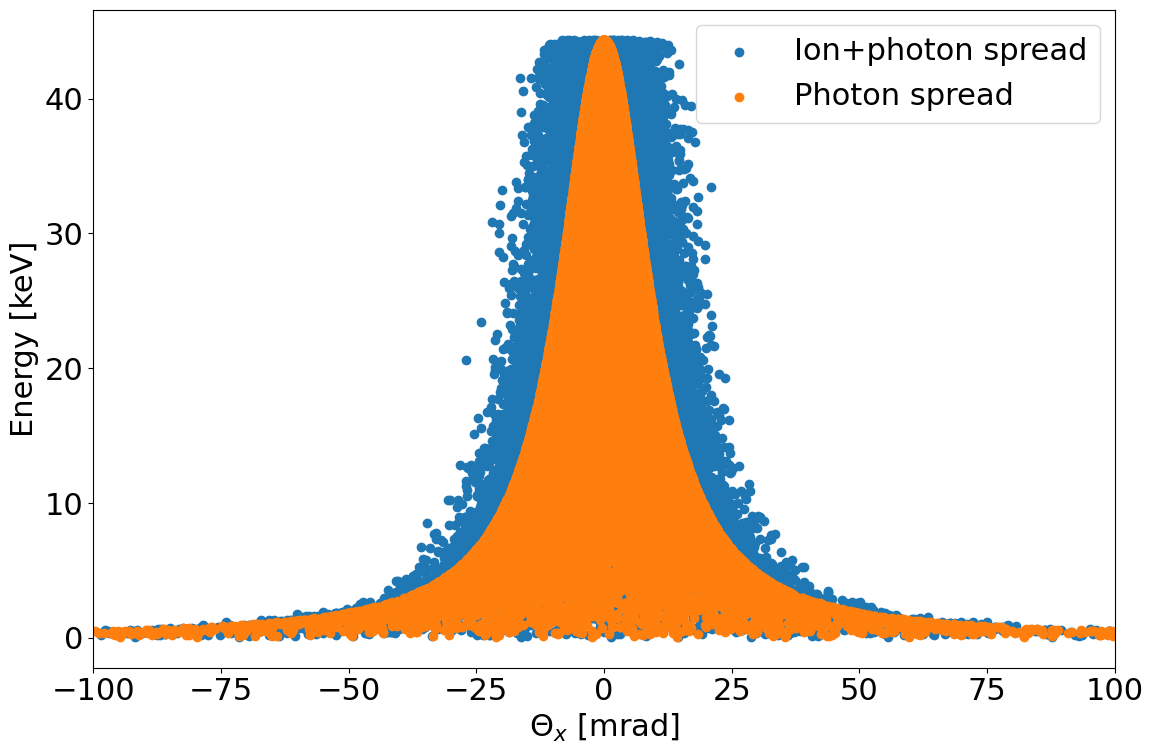

In [17]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 22})
plt.scatter(xp_photon2 * 1e3, p_photon * 1e-3, label=f'Ion+photon spread')  # Visualizing photon emission
plt.scatter(xp_photon * 1e3, p_photon * 1e-3, label=f'Photon spread')  # Visualizing photon emission


plt.xlabel('$\\Theta_x$ [mrad]')
plt.ylabel('Energy [keV]')
plt.xlim(-100,100)

plt.legend()
plt.tight_layout()
plt.savefig('figures/Photon_energy_distribution.png', dpi=300)
plt.show()


In [18]:
1/T_per_turn

43373.51628684039